In [21]:
from src.data_preprocessor import DataProcessor
from data_configs.configs import *
from models.neural_networks import *
from src.cross_validation import CrossValidation
import numpy as np

config = albalone_config
data_processor = DataProcessor(config=config)
cross_validator = CrossValidation(config=config)

In [22]:
raw_data = data_processor.load_data()
data_1 = data_processor.impute_missing_values(raw_data)
data_2 = data_processor.encode_nominal_features(data_1)
data_3 = data_processor.encode_ordinal_features(data_2)
data_4 = data_processor.standardize_data(data_3,data_3,features=['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight'])

c:\Users\Srikanta\Documents\Intro to Machine Learning\programming_assignment_1\src\data_preprocessor.py:47: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[column].fillna(data[column].mode()[0], inplace=True)
c:\Users\Srikanta\Documents\Intro to Machine Learning\programming_assignment_1\src\data_preprocessor.py:44: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work becaus

In [23]:
data_4 = data_4[['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight','Viscera weight', 'Shell weight','Sex_F', 'Sex_I', 'Sex_M','Rings']]

In [24]:
data_4

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Sex_F,Sex_I,Sex_M,Rings
0,-0.574489,-0.432097,-1.064297,-0.641821,-0.607613,-0.726125,-0.638140,0,0,1,15
1,-1.448812,-1.439757,-1.183837,-1.230130,-1.170770,-1.205077,-1.212842,0,0,1,7
2,0.050027,0.122116,-0.107978,-0.309432,-0.463444,-0.356647,-0.207114,1,0,0,9
3,-0.699393,-0.432097,-0.347058,-0.637743,-0.648160,-0.607527,-0.602222,0,0,1,10
4,-1.615350,-1.540523,-1.422916,-1.271933,-1.215822,-1.287183,-1.320599,0,1,0,7
...,...,...,...,...,...,...,...,...,...,...,...
4172,0.341468,0.424414,0.609261,0.118799,0.047902,0.532836,0.073053,1,0,0,11
4173,0.549640,0.323648,-0.107978,0.279896,0.358765,0.309325,0.155666,0,0,1,10
4174,0.632909,0.676328,1.565580,0.708127,0.748470,0.975296,0.496895,0,0,1,9
4175,0.841081,0.777094,0.250642,0.541933,0.773248,0.733540,0.410690,1,0,0,10


In [25]:
data_train, data_val = cross_validator.random_partition(data_4, random_state=42)

In [26]:
data = data_train.to_numpy()
X_train = data[:,:-1]
y_train = data[:,-1:]

In [27]:
data_test = data_val.to_numpy()
X_val = data_test[:,:-1]
y_val = data_test[:,-1:]

In [28]:
ffn = FeedForwardNetwork(config,n_input=X_train.shape[1],n_hidden_1=24,n_hidden_2=24,n_output=1)

MSEs, val_metrics, final_mse = ffn.train(X_train,y_train,X_val,y_val,3000,0.000001)

Epoch 0/3000, Train MSE: 108.51766183068044, Val MSE: 107.97817572543825


Epoch 100/3000, Train MSE: 59.56836969086846, Val MSE: 59.345548605608315
Epoch 200/3000, Train MSE: 16.80238250237786, Val MSE: 17.001878953373005
Epoch 300/3000, Train MSE: 6.551601807896637, Val MSE: 6.750532412029562
Epoch 400/3000, Train MSE: 6.348337445757208, Val MSE: 6.535667971676416
Epoch 500/3000, Train MSE: 6.15595048948174, Val MSE: 6.337499116230083
Epoch 600/3000, Train MSE: 5.943640166261183, Val MSE: 6.124456697203782
Epoch 700/3000, Train MSE: 5.707039825610655, Val MSE: 5.896099309905835
Epoch 800/3000, Train MSE: 5.462412198974809, Val MSE: 5.6733531240440955
Epoch 900/3000, Train MSE: 5.25096964815406, Val MSE: 5.497254969775267
Epoch 1000/3000, Train MSE: 5.103951350969295, Val MSE: 5.3895456086914315
Epoch 1100/3000, Train MSE: 5.0147061962390085, Val MSE: 5.3317908139516135
Epoch 1200/3000, Train MSE: 4.961678717259712, Val MSE: 5.297645608071951
Epoch 1300/3000, Train MSE: 4.928967839015786, Val MSE: 5.272975372045412
Epoch 1400/3000, Train MSE: 4.9075883715259

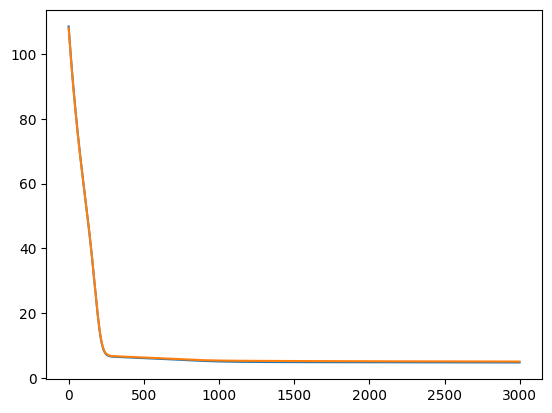

In [29]:
import matplotlib.pyplot as plt

plt.plot(MSEs)
plt.plot(val_metrics)

In [30]:
linear = LinearNetwork(config)

losses = linear.linear_regression(X_train,y_train,X_val,y_val)

Epoch 0/1000, Training MSE: 108.91823498491198, Validation MSE: 102.45239431244032
Epoch 100/1000, Training MSE: 6.514985355683393, Validation MSE: 6.576235447178137
Epoch 200/1000, Training MSE: 5.60682744451912, Validation MSE: 5.689998209040262
Epoch 300/1000, Training MSE: 5.34264473705177, Validation MSE: 5.435811701282216
Epoch 400/1000, Training MSE: 5.18688616676037, Validation MSE: 5.293508352322727
Epoch 500/1000, Training MSE: 5.0906269749428095, Validation MSE: 5.210499663844608
Epoch 600/1000, Training MSE: 5.029525034479325, Validation MSE: 5.160997670701359
Epoch 700/1000, Training MSE: 4.989867606326357, Validation MSE: 5.130942444412943
Epoch 800/1000, Training MSE: 4.963532662434508, Validation MSE: 5.1123215458468705
Epoch 900/1000, Training MSE: 4.945573961626812, Validation MSE: 5.100447111515943
